In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import layers


In [2]:
data = pd.read_csv("../input/league-of-legends-diamond-ranked-games-10-min/high_diamond_ranked_10min.csv")
data

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


In [3]:
data.shape

(9879, 40)

In [4]:
data.drop("gameId", axis = 1, inplace = True)

In [5]:
data = data.sample(frac=1).reset_index(drop=True)

In [6]:
y = data["blueWins"]

In [7]:
y

0       1
1       1
2       0
3       1
4       0
       ..
9874    0
9875    0
9876    0
9877    0
9878    1
Name: blueWins, Length: 9879, dtype: int64

In [8]:
X = data.drop("blueWins", axis = 1, inplace = False)

In [9]:
X.shape

(9879, 38)

<AxesSubplot:>

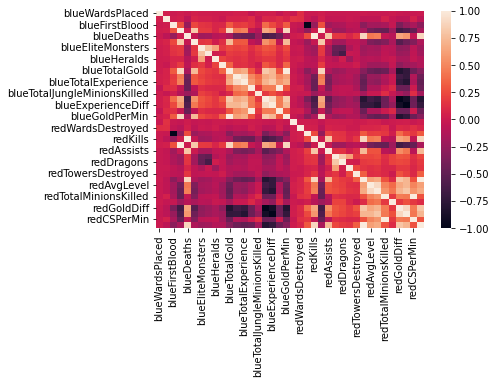

In [10]:
sns.heatmap(X.corr())

In [11]:
train_test_split = 0.7

num_examples = X.shape[0]
num_train_examples = int(np.floor(num_examples * train_test_split))
num_test_examples = int(np.ceil(num_examples - num_train_examples))

print(num_examples)
print(num_train_examples)
print(num_test_examples)

9879
6915
2964


In [12]:
X_train = X.iloc[0:num_train_examples, :]
y_train = y.iloc[0:num_train_examples]

X_test = X.iloc[num_train_examples:num_examples, :]
y_test = y.iloc[num_train_examples:num_examples]

In [13]:
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam'
)

In [14]:
inputs = tf.keras.Input(shape=(38,))
x = tf.keras.layers.Dense(16, activation=tf.nn.relu)(inputs)
x = tf.keras.layers.Dense(16, activation=tf.nn.relu)(x)
outputs = tf.keras.layers.Dense(2, activation=tf.nn.softmax)(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 38)]              0         
_________________________________________________________________
dense (Dense)                (None, 16)                624       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 34        
Total params: 930
Trainable params: 930
Non-trainable params: 0
_________________________________________________________________


2022-08-12 02:19:03.261855: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [15]:
model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [16]:
BATCH_SIZE = 32
EPOCHS = 300

In [17]:
model.fit(
    x=X_train,
    y=y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose=1,
    validation_split=0.2,
    shuffle=True
)

2022-08-12 02:19:03.490664: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/300
173/173 [==============================] - 1s 3ms/step - loss: 63.5076 - accuracy: 0.6453 - val_loss: 19.3094 - val_accuracy: 0.6305
Epoch 2/300
173/173 [==============================] - 0s 2ms/step - loss: 11.5919 - accuracy: 0.6303 - val_loss: 10.5495 - val_accuracy: 0.6537
Epoch 3/300
173/173 [==============================] - 0s 2ms/step - loss: 11.7420 - accuracy: 0.6446 - val_loss: 4.3036 - val_accuracy: 0.6392
Epoch 4/300
173/173 [==============================] - 0s 2ms/step - loss: 7.5888 - accuracy: 0.6421 - val_loss: 9.4055 - val_accuracy: 0.7028
Epoch 5/300
173/173 [==============================] - 0s 2ms/step - loss: 6.1454 - accuracy: 0.6367 - val_loss: 8.7493 - val_accuracy: 0.5054
Epoch 6/300
173/173 [==============================] - 0s 2ms/step - loss: 8.6959 - accuracy: 0.6312 - val_loss: 3.2224 - val_accuracy: 0.7021
Epoch 7/300
173/173 [==============================] - 0s 2ms/step - loss: 8.0357 - accuracy: 0.6444 - val_loss: 3.5921 - val_accuracy: 0

In [18]:
model.fit(
    x=X_train,
    y=y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose=1,
    validation_split=0.2,
    shuffle=True
)

Epoch 1/300
173/173 [==============================] - 0s 2ms/step - loss: 0.5689 - accuracy: 0.7081 - val_loss: 0.5753 - val_accuracy: 0.7072
Epoch 2/300
173/173 [==============================] - 0s 2ms/step - loss: 0.5746 - accuracy: 0.7090 - val_loss: 0.5823 - val_accuracy: 0.7195
Epoch 3/300
173/173 [==============================] - 0s 2ms/step - loss: 0.5630 - accuracy: 0.7193 - val_loss: 0.5486 - val_accuracy: 0.7260
Epoch 4/300
173/173 [==============================] - 0s 2ms/step - loss: 0.5832 - accuracy: 0.7057 - val_loss: 0.5509 - val_accuracy: 0.7252
Epoch 5/300
173/173 [==============================] - 0s 2ms/step - loss: 0.5652 - accuracy: 0.7193 - val_loss: 0.5462 - val_accuracy: 0.7296
Epoch 6/300
173/173 [==============================] - 0s 2ms/step - loss: 0.5599 - accuracy: 0.7187 - val_loss: 0.5606 - val_accuracy: 0.7303
Epoch 7/300
173/173 [==============================] - 0s 2ms/step - loss: 0.5699 - accuracy: 0.7093 - val_loss: 0.5538 - val_accuracy: 0.7317